<a href="https://colab.research.google.com/github/ainunsw3/DataVisualization/blob/main/Visualization_Movie_amazon_prime.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exploratory Data Analysis**




In [1]:
!pip install -q kaggle

In [2]:
!mkdir ~/.kaggle

In [3]:
!cp kaggle.json ~/.kaggle

In [4]:
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets list

ref                                                            title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
asinow/car-price-dataset                                       Car Price Dataset                                   135KB  2025-01-26 19:53:28           9784        134  1.0              
anandshaw2001/netflix-movies-and-tv-shows                      Netflix Movies and TV Shows                           1MB  2025-01-03 10:33:01          18549        467  1.0              
sgoutami/spotify-streaming-history                             Spotify Streaming History                             6MB  2025-01-25 05:14:49           1975         34  1.0              
samithsachidanandan/most-popular-1000-youtube-videos           Mo

In [6]:
!kaggle datasets download -d 'shivamb/amazon-prime-movies-and-tv-shows'

Dataset URL: https://www.kaggle.com/datasets/shivamb/amazon-prime-movies-and-tv-shows
License(s): CC0-1.0
  0% 0.00/1.61M [00:00<?, ?B/s]
100% 1.61M/1.61M [00:00<00:00, 104MB/s]


In [7]:
import zipfile

In [8]:
dataset_zip = zipfile.ZipFile('amazon-prime-movies-and-tv-shows.zip', 'r')
dataset_zip.extractall()
dataset_zip.close()

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
dataset = 'amazon_prime_titles.csv'
df = pd.read_csv(dataset)

In [11]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...


In [12]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9668 entries, 0 to 9667
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       9668 non-null   object
 1   type          9668 non-null   object
 2   title         9668 non-null   object
 3   director      7585 non-null   object
 4   cast          8435 non-null   object
 5   country       672 non-null    object
 6   date_added    155 non-null    object
 7   release_year  9668 non-null   int64 
 8   rating        9331 non-null   object
 9   duration      9668 non-null   object
 10  listed_in     9668 non-null   object
 11  description   9668 non-null   object
dtypes: int64(1), object(11)
memory usage: 906.5+ KB
None


In [13]:
print('Jumlah missing values disetiap kolom:\n', df.isnull().sum())

Jumlah missing values disetiap kolom:
 show_id            0
type               0
title              0
director        2083
cast            1233
country         8996
date_added      9513
release_year       0
rating           337
duration           0
listed_in          0
description        0
dtype: int64


In [14]:
df['country'].fillna('Unknown', inplace=True)

df['rating'].fillna(df['rating'].mode()[0], inplace=True)

df['date_added'].fillna(df['date_added'].mode()[0], inplace=True)

<ipython-input-14-d19fe37012e4>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['country'].fillna('Unknown', inplace=True)
<ipython-input-14-d19fe37012e4>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using '

In [15]:
df_cleaned = df.drop(columns=['director', 'cast'])

In [18]:
print('Jumlah missing values disetiap kolom:\n', df_cleaned.isnull().sum())

Jumlah missing values disetiap kolom:
 show_id         0
type            0
title           0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64


In [20]:
df_cleaned.duplicated().sum()

0

In [17]:
df_cleaned.head()

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,The Grand Seduction,Canada,"March 30, 2021",2014,13+,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,s2,Movie,Take Care Good Night,India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,s3,Movie,Secrets of Deception,United States,"March 30, 2021",2017,13+,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,s4,Movie,Pink: Staying True,United States,"March 30, 2021",2014,13+,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
4,s5,Movie,Monster Maker,United Kingdom,"March 30, 2021",1989,13+,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...


In [21]:
print(df_cleaned.describe())

       release_year
count   9668.000000
mean    2008.341849
std       18.922482
min     1920.000000
25%     2007.000000
50%     2016.000000
75%     2019.000000
max     2021.000000


# **Visualization**

In [22]:
df_cleaned['type'].value_counts()

,count
type,
Movie,7814
TV Show,1854


<ipython-input-29-d1f8919afd66>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cleaned, x= "type", palette="Set3")


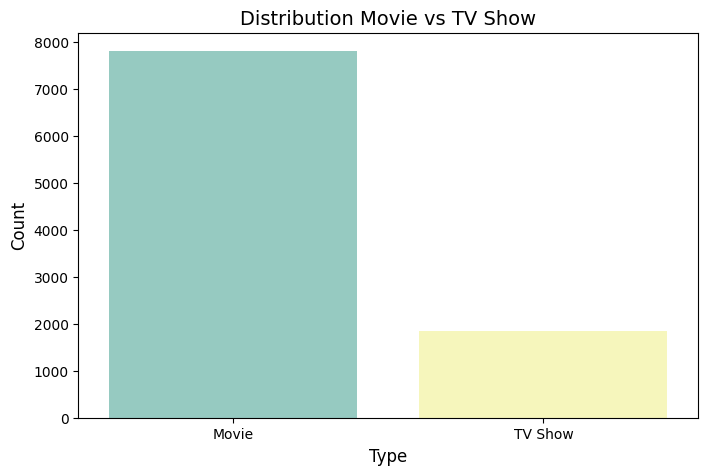

In [29]:
plt.figure(figsize=(8,5))
sns.countplot(data=df_cleaned, x= "type", palette="Set3")
plt.title('Distribution Movie vs TV Show', fontsize=14)
plt.xlabel('Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

<ipython-input-30-8817639abadd>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5_categories.values, y=top_5_categories.index, palette="Set3")


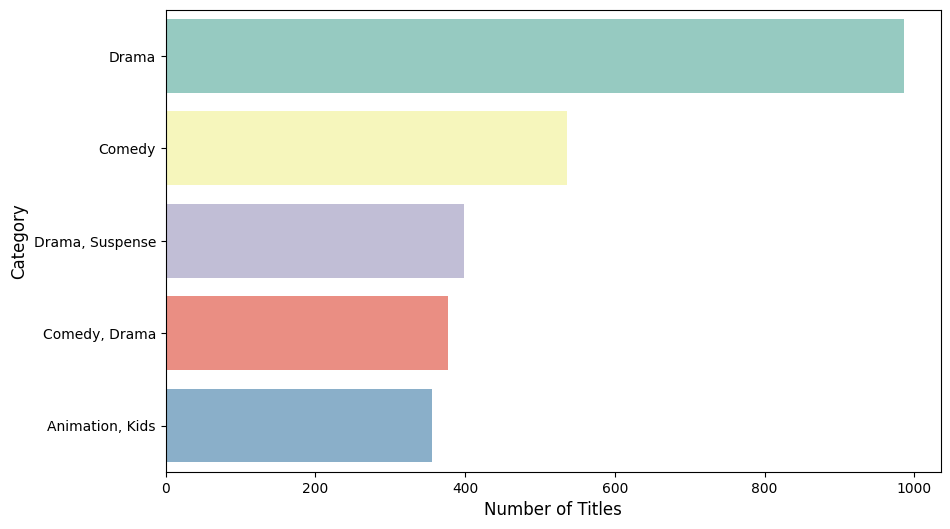

In [30]:
top_5_categories = df_cleaned["listed_in"].value_counts().head(5)

plt.figure(figsize=(10,6))
sns.barplot(x=top_5_categories.values, y=top_5_categories.index, palette="Set3")
plt.xlabel('Number of Titles', fontsize=12)
plt.ylabel('Category', fontsize=12)
plt.show()

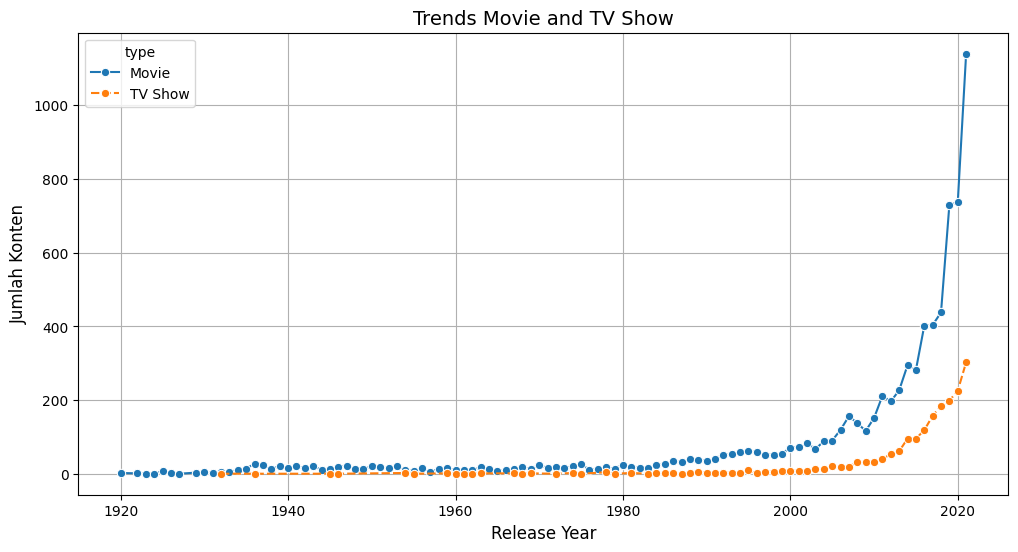

In [52]:
release_trend = df_cleaned.groupby(["release_year", "type"]).size().unstack()
plt.figure(figsize=(12,6))
sns.lineplot(data=release_trend, marker="o", color="b")

plt.title("Trends Movie and TV Show", fontsize=14)
plt.xlabel("Release Year", fontsize=12)
plt.ylabel("Jumlah Konten", fontsize=12)
plt.grid(True)

plt.show()

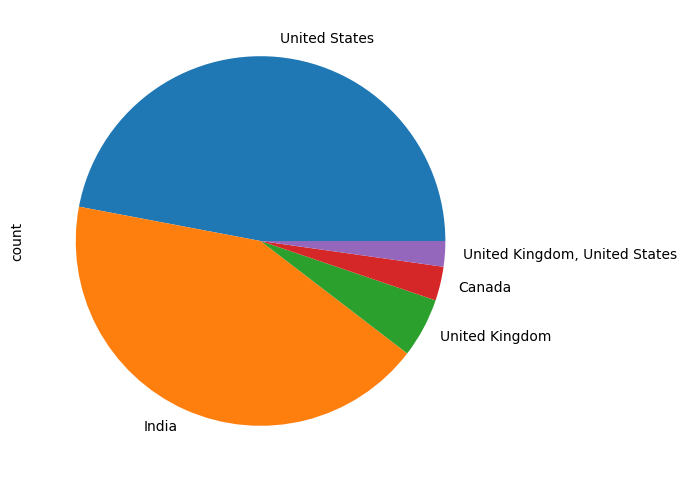

In [60]:
df_filtered = df_cleaned[df_cleaned["country"] != "Unknown"]
plt.figure(figsize = (8,6))
df_filtered['country'].value_counts().head(5).plot.pie()
plt.show()

In [ ]:
df_cleaned.to_csv('movie.csv', index = False)